In [1]:
using ElectricGrid
using ControlSystemsBase
using PlotlyJS

In [2]:
CM = [0 1
    -1 0]
    
# Source
R = 1.1e-3
L = 70e-6
C = 250e-6

# Cable
C_b = 1e-4/2
L_b = 1e-4
R_b = 1e-3

# Load
R_l = 100
C_l = 1e-2
L_l = 1e-2;

parameters = Dict()

grid_properties = Dict()
grid_properties["fs"] =  10e3
grid_properties["v_rms"] = 230
grid_properties["phase"] = 1;
parameters["grid"] = grid_properties

source1 = Dict()
source_list = []

# source1["fltr"] = "LC"
source1["fltr"] = "L"
source1["R1"] = R
source1["L1"] = L
# source1["C"] = C

push!(source_list, source1)

parameters["source"] = source_list

cable = Dict()
cable["R"] = R_b
cable["L"] = L_b
cable["C"] = C_b
cable_list = []

push!(cable_list, cable);
parameters["cable"] = cable_list

load1 = Dict()
load_list = []

load1["impedance"] = "RLC"
load1["R"] = R_l;
load1["L"] = L_l;
load1["C"] = C_l;

push!(load_list, load1);
parameters["load"] = load_list;

In [3]:
nc = NodeConstructor(num_sources=1, num_loads=1, parameters=parameters, CM=CM);

In [4]:
A, B, C, D = GetSystem(nc);

In [5]:
ts = 1e-5
Ad = exp(A*ts)
Bd = A \ (Ad - C) * B
sys_d = StateSpace(Ad, Bd, C, D, ts);

In [6]:
ns = length(A[1,:]) # get num of states
ni = length(B[1,:]) # get num of inputs
t = collect(0:ts:0.1)
x0 = [0.0 for i = 1:ns]
u = [250.0 for i = 1:length(t)]
uu = [u for i = 1:ni ]
uuu = mapreduce(permutedims, vcat, uu);

In [7]:
xout, _, _, _ = lsim(sys_d,uuu,t,x0=x0);

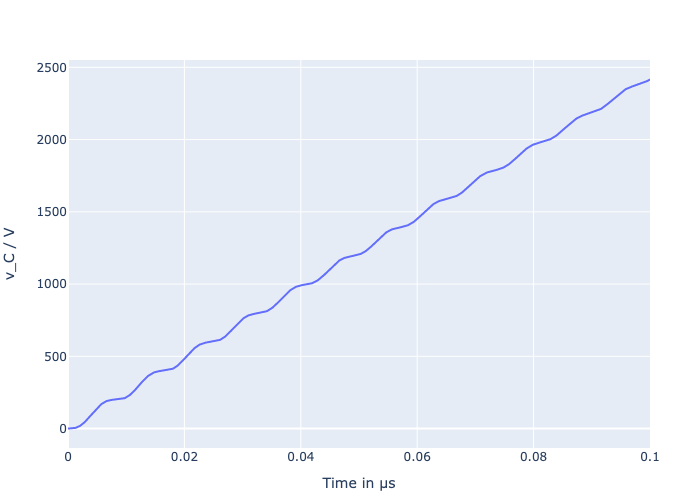

In [12]:
layout = Layout(xaxis_title="Time in µs", yaxis_title="v_C / V")
p = Plot(t, xout[5,:], layout)
display(p)